<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Изучение-данных" data-toc-modified-id="Изучение-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Изучение данных</a></span></li><li><span><a href="#Исследовательский-анализ-данных" data-toc-modified-id="Исследовательский-анализ-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Исследовательский анализ данных</a></span><ul class="toc-item"><li><span><a href="#Модели-самолетов-и-количество-рейсов" data-toc-modified-id="Модели-самолетов-и-количество-рейсов-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Модели самолетов и количество рейсов</a></span></li><li><span><a href="#Города-и-количество-рейсов" data-toc-modified-id="Города-и-количество-рейсов-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Города и количество рейсов</a></span></li><li><span><a href="#Топ-10-городов-и-количество-рейсов" data-toc-modified-id="Топ-10-городов-и-количество-рейсов-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Топ-10 городов и количество рейсов</a></span></li></ul></li></ul></div>

# Анализ факторов спроса на авиаперевозки #

В рамках изучения предпрочтений пользователей российской авиакомпании «F9» проанализируем динамику пассажирских перевозок в месяцы проведения музыкальных фестивалей. Также изучим, как соотносится число совершаемых полетов для разных моделей самолетов.  

На предварительном этапе сбора и обработки данных было установлено, что лучшие музыкальные фестивали 2018 года проходили в период с 1 июля по 8 августа. Для лучшего понимания влияния фестивалей на пассажиропоток дальнейший анализ будет проводиться на примере Москвы - города с максимальным числом рейсов, где проходило три фестиваля: Park Live, Пикник Афиши и Видфест.

Распределение перевозок по моделям самолетов будет анализироваться на основе данных по всем городам.

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display

## Изучение данных ##

Откроем файлы с данными и изучим общую информацию:

In [2]:
def file_read (server_path, filename):
    if os.path.exists(server_path):
        file_read = pd.read_csv(server_path)
    else:
        file_read = pd.read_csv(filename)
    return file_read
    
models = file_read('/datasets/query_1.csv','query_1.csv')
cities = file_read('/datasets/query_3.csv','query_3.csv')

**Модели самолетов**

In [3]:
models.info()
display(models)
print('Дубликатов в таблице: {}'.format(models.duplicated().sum()))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 3 columns):
Unnamed: 0        8 non-null int64
model             8 non-null object
flights_amount    8 non-null int64
dtypes: int64(2), object(1)
memory usage: 320.0+ bytes


,Unnamed: 0,model,flights_amount
0,0,Airbus A319-100,607
1,1,Airbus A321-200,960
2,2,Boeing 737-300,630
3,3,Boeing 767-300,600
4,4,Boeing 777-300,300
5,5,Bombardier CRJ-200,4446
6,6,Cessna 208 Caravan,4557
7,7,Sukhoi SuperJet-100,4185


Дубликатов в таблице: 0


В первом наборе данных содержится информация о количестве рейсов, выполненных на каждой модели самолета в сентябре 2018 года. Таблица содержит 8 записей, типы данных распознаны корректно.

**Города**

In [4]:
cities.info()
display(cities.head())
print('Дубликатов в таблице: {}'.format(cities.duplicated().sum()))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 3 columns):
Unnamed: 0         101 non-null int64
city               101 non-null object
average_flights    101 non-null float64
dtypes: float64(1), int64(1), object(1)
memory usage: 2.5+ KB


,Unnamed: 0,city,average_flights
0,0,Абакан,3.870968
1,1,Анадырь,1.000000
2,2,Анапа,2.161290
3,3,Архангельск,5.354839
4,4,Астрахань,2.451613


Дубликатов в таблице: 0


Второй набор данных содержит среднедневное количество прибывающих рейсов в августе 2018 года по 101 городу. Типы переменных так же распознаны корректно.

## Исследовательский анализ данных

### Модели самолетов и количество рейсов ###

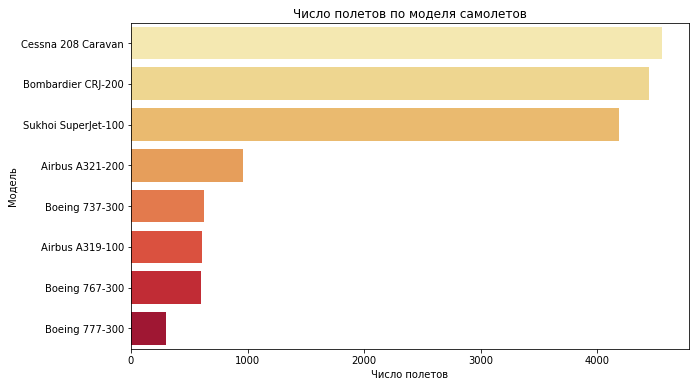

In [5]:
models = models.sort_values(by='flights_amount', ascending=False)
plt.figure(figsize=(10,6))
sns.barplot(y = models['model'], x=models['flights_amount'], palette='YlOrRd')
plt.title("Число полетов по моделя самолетов")
plt.ylabel("Модель")
plt.xlabel("Число полетов")
plt.show()

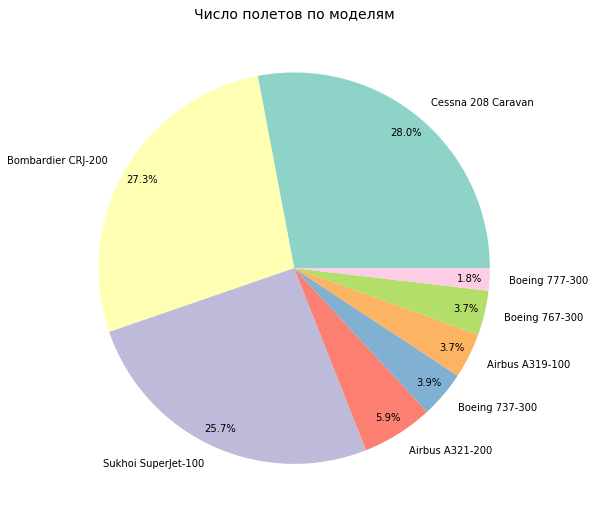

In [6]:
pie, ax = plt.subplots(figsize=[10,9])
labels = models['model']
plt.pie(x=models['flights_amount'], autopct="%.1f%%", labels=labels, colors=plt.cm.Set3.colors, pctdistance=0.9)
plt.title('Число полетов по моделям', fontsize=14)
plt.show()  

Важно обратить внимание на то, что модели Cessna 208 Caravan и Bombardier CRJ-200, являющиеся лидерами по числу рейсов, предназначены для малой авиации (до 14 и 50 пассажиров соответственно) и используются для полетов малой протяженности и непопулярных направлений. Следовательно, при большем количесве рейсов пассажиропоток на этих самолетах может оказаться существенно меньше, чем для более вместительных моделей. Sukhoi SuperJet-100, занявший 3 место, использовался в 25,7% рейсов.

На этапе предварительной обработки данных было также посчитано, что за рассматриваемый период различные модели Airbus совершили 1567 полетов, Boeing - 1530 полетов, а 13188 полетов произведено на суднах других производителей.

### Города и количество рейсов ###

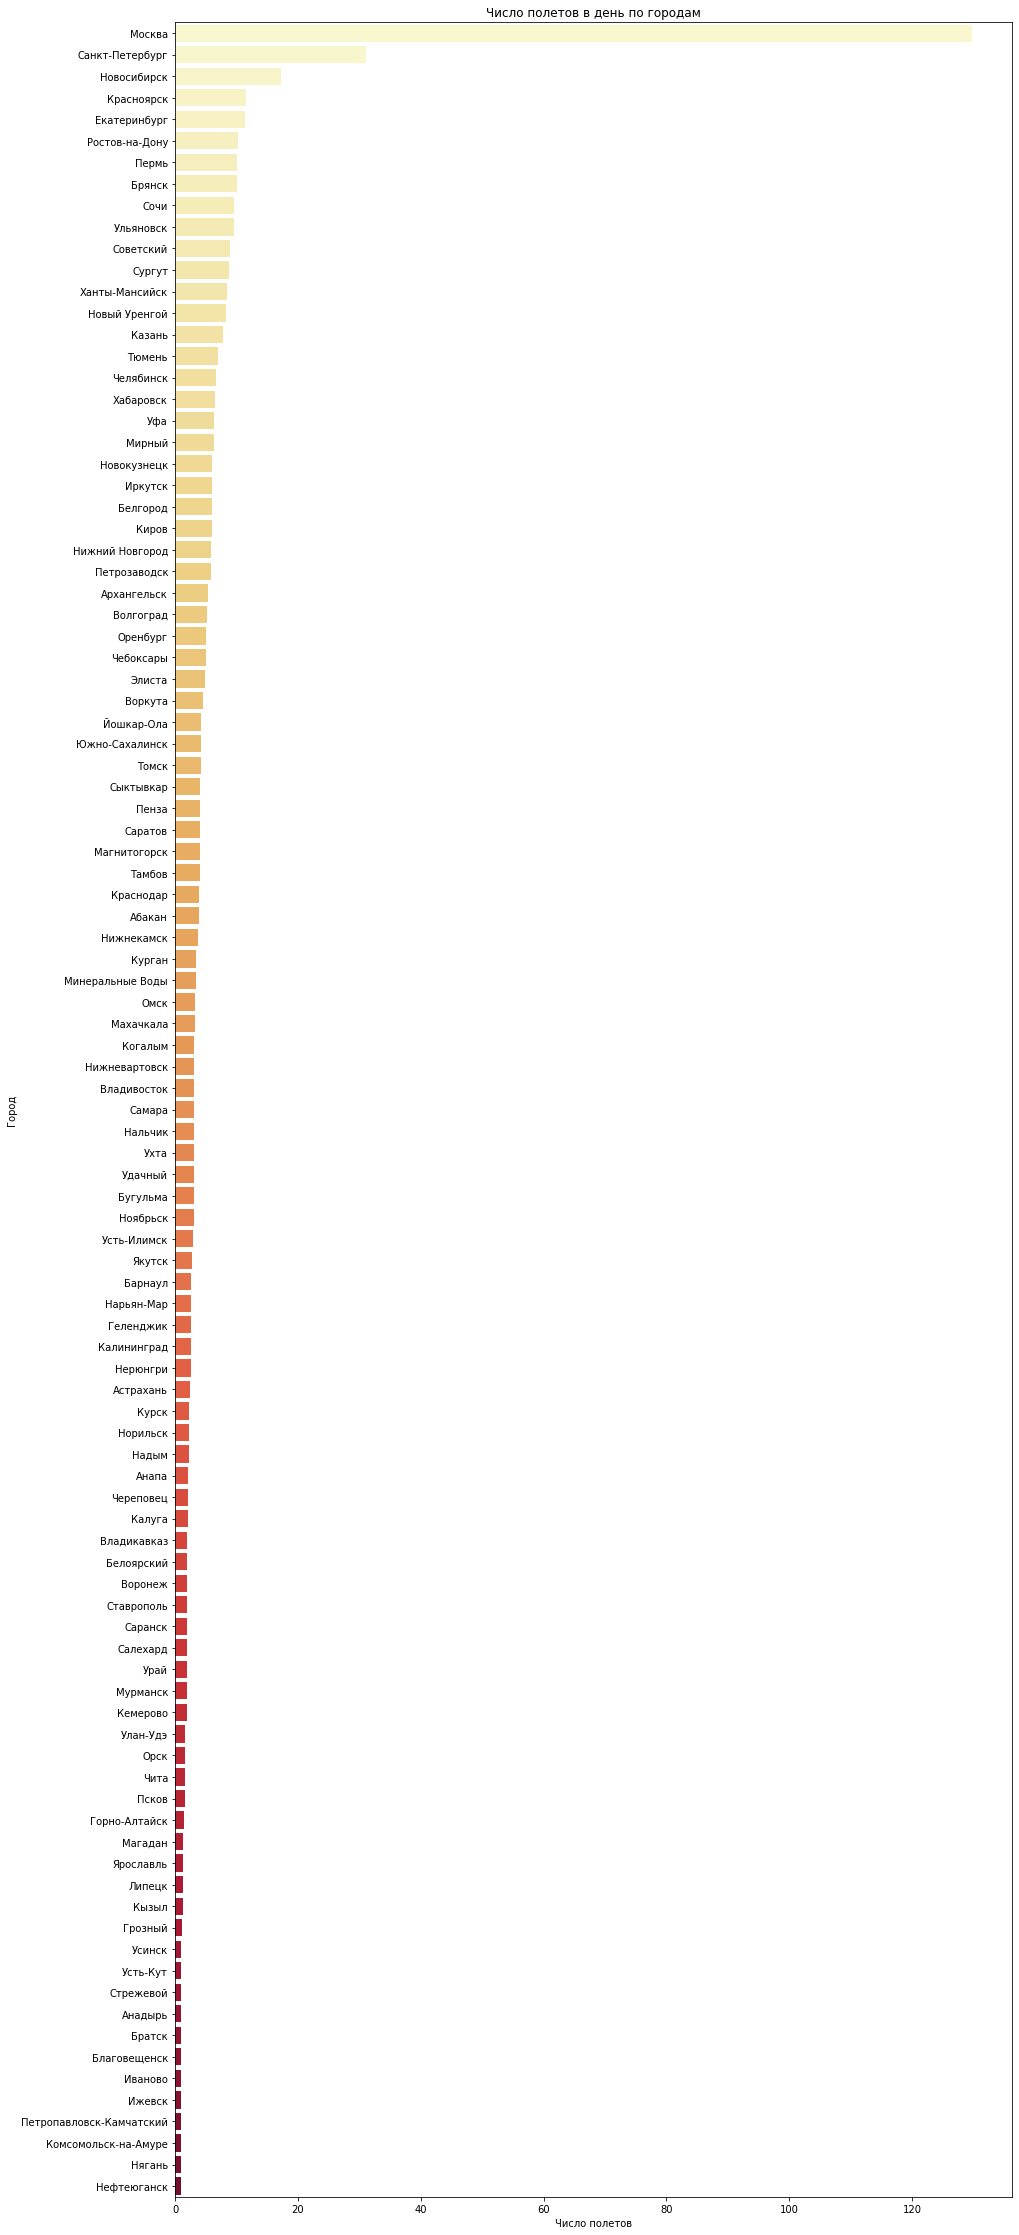

In [7]:
cities = cities.sort_values(by='average_flights', ascending=False)
plt.figure(figsize=(15,40))
sns.barplot(y = cities['city'], x=cities['average_flights'], palette='YlOrRd')
plt.title("Число полетов в день по городам")
plt.xlabel("Число полетов")
plt.ylabel("Город")
plt.show()

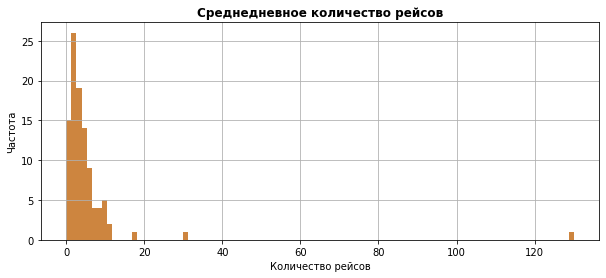

count    101.000000
mean       5.494189
std       13.119790
min        1.000000
25%        2.000000
50%        3.000000
75%        5.870968
max      129.774194
Name: average_flights, dtype: float64

In [8]:
cities.plot(y = 'average_flights', kind = 'hist', bins = 100, color = 'peru',
            legend=None, grid=True, figsize = (10,4), range = (0,130))
plt.xlabel('Количество рейсов')
plt.ylabel('Частота')
plt.title('Среднедневное количество рейсов', fontweight ="bold")
plt.show()
cities['average_flights'].describe()

Для большинства городов проведения фестивалей есть информация о количестве прибывших рейсов (кроме Иркутска и Твери). Это может расширить возможности дальнейшего анализа событийного эффекта.

В среднем ежедневно каждый город принимал 5,5 рейсов, при этом в половину городов ежедневно прибывало от 2 до 6 рейсов. Распределение смещено вправо за счет Москвы и Санкт-Петербурга.

### Топ-10 городов и количество рейсов ###

In [9]:
top_cities=cities.sort_values(by='average_flights', ascending=False).reset_index(drop=True).round(2).head(10)
display(top_cities)

,Unnamed: 0,city,average_flights
0,43,Москва,129.77
1,70,Санкт-Петербург,31.16
2,54,Новосибирск,17.32
3,33,Красноярск,11.58
4,20,Екатеринбург,11.32
5,67,Ростов-на-Дону,10.19
6,63,Пермь,10.13
7,10,Брянск,10.00
8,74,Сочи,9.61
9,84,Ульяновск,9.58


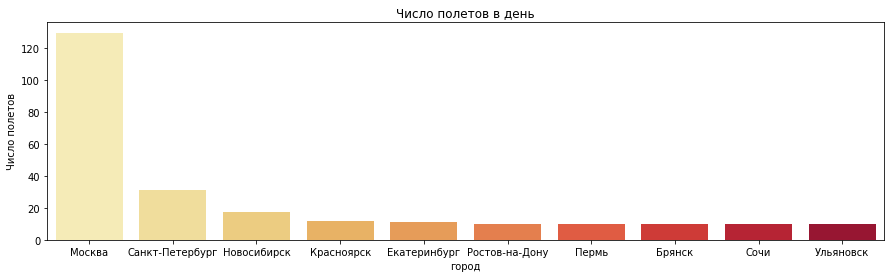

In [10]:
plt.figure(figsize=(15,4))
sns.barplot(x = top_cities['city'], y=top_cities['average_flights'], palette='YlOrRd')
plt.title("Число полетов в день")
plt.xlabel("город")
plt.ylabel("Число полетов")
plt.show()

Закономерно, что Москва являлась лидером по числу среднедневных рейсов в августе 2018 года. На 2 месте Санкт-Петербург со значением в 4 раза меньше. Остальные города первой десятки ежедневно принимали не более 20 рейсов в среднем.

# Общие выводы #

**Предварительная обработка данных**    
Исходные данные содержали информацию о 104 аэропортах в российском 101 городе (3 аэропорта находятся в Москве) и рейсах, прибывающих и вылетающих из этих аэропортов. 

Чтобы посчитать среднее количество рейсов в день для каждого города, на предварительном этапе было произведено объединение таблиц flights и airports по идентификаторам аэропортов, после чего данные были агрегированы по городам.
    
Чтобы найти количество рейсов на каждой модели самолёта, было необходимо объединить содержимое таблиц flights и aircrafts по уникальным идентификаторам самолётов. При этом вылеты по моделям самолетов были посчитаны за сентябрь, хотя дальнейший анализ распределения рейсов строился на данных августа. Несмотря на то, что соотношение полетов по моделям в августе аналогично данным за сентябрь, при последующем анализе следует выбирать единый отрезок времени для всех срезов.

Чтобы посчитать количество билетов, купленных на рейсы в Москву и соотнести с неделями проведения фестивалей, было также произведено последовательное объединение таблиц с рейсами, проданными билетами, аэропортами, а также полученной путем парсинга таблицы с датами и городами проведения фестивалей.
    
**Основной анализ**    
Последующий анализ полученных таблиц показал, что наибольшей популярностью в рассматриваемый период пользовались самолеты малой вместимости моделей Bombardier CRJ-200, Cessna 208 Caravan и Sukhoi SuperJet-100: за август было совершено 4446, 4557 и 4185 полетов соответственно. В свою очередь, предварительное изучение рейсов самолетов стандартной вместимости показало, что суммарно самолеты всех моделей Airbus совершили 1567 полетов, Boeing - 1530 полетов.

Самыми популярными, исходя из среднедневного числа прилетающих рейсов, оказались такие города, как Москва, Санкт-Петербург, Новосибирск, Красноярск	и Екатеринбург, однако значение показателя по Москве (129,77) в 4 раза больше, чем в Санкт-Петербурге (31,16) и более чем в 7 раз больше, чем в других городах первой десятки. Четрверть от всех рассматриваемых городов принимала менее 2 самолетов в день в среднем. Наименее популярными оказались такие города, как Ижевск, Петропавлосвк-Камчатский, Комсомольск-на-Амуре, Нягань и Нефтеюганск. Можно предположить, что значительная часть рейсов в эти города выполняется самолетами малой вместительности. 
    
Изучение распредления рейсов по городам и моделям самолетов позволяет не столько сделать выводы о предпочтениях пользователей, сколько понять ограничения данных. Во-первых, из-за различий вместимости разных моделей самолоетов некорректно анализировать только число рейсов, более надежной метрикой для анализа событийных или иных эффектов будет пассажиропоток. Во-вторых, имеющиеся данные дают возможность оценивать "фествильный эффект" не только для Москвы, но и для ряда других городов, отличающихся как по числу рейсов, так и по пассажиропотоку.

Полученная на предварительном этапе таблица еженедельного пассажиропотока в Москве не позволяет сделать выводы о связи фестивалей и спроса на билеты: в недели проведения фестивалей спрос на билеты близок или даже ниже в сравнении с другими неделями.Учитывая это наблюдение, при дальнейшем анализе можно проверить гипотезу о том, что во время фестивалей спрос практически не меняется (используя данные нескольких городов).